In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:


# In case the above fails, e.g. because of missing internet connection
# use the following lists as fallback.

missions = {'Uhuru' :               ['1970-12-12', 'past'],
            'OSO 7' :               ['1971-09-29', 'past'],
            'OAO-3' :               ['1972-08-21', 'past'],
            'Ariel 5' :             ['1974-10-15', 'past'],
            'ANS' :                 ['1974-08-29', 'past'],
            'Cos-B' :               ['1975-08-09', 'past'],
            'OSO 8' :               ['1975-06-21', 'past'],
            'SAS-3' :               ['1975-05-07', 'past'],
            'HEAO-1' :              ['1977-08-12', 'past'],
            'HEAO-2 ' :             ['1978-11-13', 'past'],
            'Ariel 6' :             ['1979-06-02', 'past'],
            'Hakucho' :             ['1979-02-21', 'past'],
            'HEAO 3' :              ['1979-09-20', 'past'],
            'Hinotori' :            ['1981-02-21', 'past'],
            'EXOSAT' :              ['1983-05-26', 'past'],
            'Tenma' :               ['1983-02-20', 'past'],
            'Ginga' :               ['1987-02-05', 'past'],
            'Granat' :              ['1989-12-01', 'past'],
            'BBXRT' :               ['1989-12-02', 'past'],
            'ROSAT' :               ['1990-06-01', 'past'],
            'CGRO' :                ['1991-04-05', 'past'],
            'Yohkoh' :              ['1991-08-30', 'past'],
            'ASCA' :                ['1993-02-20', 'past'],
            'ALEXIS' :              ['1993-04-25', 'past'],
            'DXS' :                 ['1993-01-13', 'past'],
            'RXTE' :                ['1995-12-30', 'past'],
            'BeppoSAX' :            ['1996-04-30', 'past'],
            'HETE-1' :              ['1996-11-04', 'past'],
            'Chandra' :             ['1999-06-23', 'active'],
            'XMM-Newton' :          ['1999-12-10', 'active'],
            'INTEGRAL' :            ['2002-10-17', 'active'],
            'RHESSI' :              ['2002-02-05', 'past'],
            'Swift' :               ['2004-11-20', 'active'],
            'Suzaku' :              ['2005-07-10', 'past'],
            'Hinode' :              ['2006-09-22', 'active'],
            'AGILE' :               ['2007-04-23', 'active'],
            'Fermi' :               ['2008-06-11', 'active'],
            'MAXI' :                ['2009-07-15', 'active'],
            'NuSTAR' :              ['2012-06-13', 'active'],
            'Astrosat' :            ['2015-09-28', 'active'],
            'Hitomi' :              ['2016-02-17', 'past'],
            'HXMT' :                ['2017-06-14', 'active'],
            'NICER' :               ['2017-06-03', 'active'],
            'eROSITA / Spektr-RG' : ['2019-07-13', 'active'],
            'IXPE' :                ['2021-12-09', 'active'],
            'XPoSat' :              ['2022-06-01', 'planned'],
            'XRISM' :               ['2022-12-31', 'planned'],
            'ATHENA' :              ['2034-01-01', 'planned']}

color_dict = {'past': 'red',
              'active': 'green',
              'planned':'blue'}

names = list(missions.keys())
dates = [v[0] for v in missions.values()]
colors = [color_dict[v[1]] for v in missions.values()]


# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

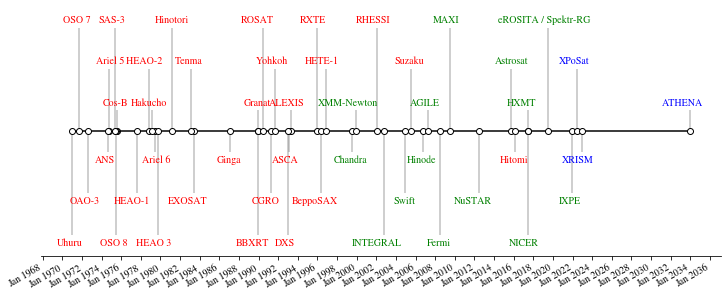

In [10]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
#ax.set(title="X-ray Observatory Timeline")

ax.vlines(dates, 0, levels, color="grey", alpha=0.5)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r, c in zip(dates, levels, names, colors):
    ax.annotate(r, xy=(d, l), fontsize=10,
                xytext=(2.2*len(r), np.sign(l)*3),
                color=c,
                textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.savefig('../figures/thesis/observatory_timeline.pdf')
plt.savefig('../figures/thesis/observatory_timeline.png')
#plt.tight_layout()
plt.show()

In [5]:
levels

array([-5,  5, -3,  3, -1,  1, -5,  5, -3,  3, -1,  1, -5,  5, -3,  3, -1,
        1, -5,  5, -3,  3, -1,  1, -5,  5, -3,  3, -1,  1, -5,  5, -3,  3,
       -1,  1, -5,  5, -3,  3, -1,  1, -5,  5, -3,  3, -1,  1])